In [228]:
# Import all the neccessary modules

from matplotlib import pyplot as plt

import seaborn as sb
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [229]:
# Read the Titanic dataset into a dataframe df
df = pd.read_excel('D:/data/titanic3.xls')

In [230]:
# Check the columns of the dataframe
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [231]:
# Let's add on column that would represent the PasengerID
df['PassengerId'] = df.reset_index().index

In [232]:
# Assign the survived column to the y dataset. This is the classes
y = df['survived']

In [233]:
# Take out the survived column from feature set
X = df.drop(['survived'], axis=1)

In [234]:
# Check that the PassengerId column is now available in the dataset
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'PassengerId'],
      dtype='object')

In [235]:
# Drop the home.dest column
X = X.drop('home.dest', axis=1)

In [236]:
# Drop the body column
X = X.drop('body', axis=1)

In [237]:
# Drop the boat column
X = X.drop('boat', axis=1)

In [238]:
# View the first 10 rows of the X data
X.head(10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,PassengerId
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,2
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,4
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,5
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,6
7,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,7
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,8
9,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,9


In [239]:
# View the first 5 rows of the classes (y)
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [240]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [241]:
# Check the shapes of the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(916, 11) (393, 11) (916,) (393,)


In [242]:
# You can see that the training dataset has 916 rows while the test dataset has 393 rows

In [243]:
# View the first 5 rows of the X dataset
X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,PassengerId
501,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,501
588,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,588
402,2,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,402
1193,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,1193
686,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,686


In [244]:
# Actually, we only need two datasets: test_dataset and train_dataset
# The train_dataset contains both the features and the classes
# While the test_dataset contains only the classes

In [245]:
# So let's create the train_dataset by combining X_train, and y_train (you can add .reindex(X_train.index) at the end)
train_dataset = pd.concat([X_train, y_train], axis=1)

In [246]:
# Check the first 5 rows of the training dataset. See that the class survived have been added back
train_dataset.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,PassengerId,survived
501,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,501,1
588,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,588,1
402,2,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,402,1
1193,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,1193,0
686,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,686,1


In [247]:
train_dataset.shape

(916, 12)

In [252]:
# Assign X_test that the variable test_dataset (so it matches with train_dataset!)
test_dataset = X_test

In [253]:
# Check the shape of the test dataset
test_dataset.shape

(393, 11)

In [254]:
# Get the information on the test_dataset
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 1139 to 88
Data columns (total 11 columns):
pclass         393 non-null int64
name           393 non-null object
sex            393 non-null object
age            305 non-null float64
sibsp          393 non-null int64
parch          393 non-null int64
ticket         393 non-null object
fare           392 non-null float64
cabin          81 non-null object
embarked       393 non-null object
PassengerId    393 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 36.8+ KB


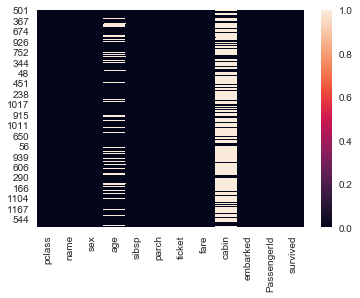

In [255]:
# Check where we have missive values using a heatmap
sb.heatmap(train_dataset.isnull())

In [256]:
# From the heatmap, you can see that there is so many missing values in age and cabin

In [257]:
# Count how many are actaully null in the training dataset
train_dataset.isnull().sum()

pclass           0
name             0
sex              0
age            175
sibsp            0
parch            0
ticket           0
fare             0
cabin          702
embarked         2
PassengerId      0
survived         0
dtype: int64

In [258]:
# Now this is a lot!
# Let's see what we can do about it

In [259]:
# We would play some kind of trick, using the Passengers class.
# If the class is 1st class, then we assume the age is about 40.
# If the class is 2nd class, then we assume the age is 30
# Otherwise, we assume the age is 24
# The code is given below as a function that returns the age given the age and the pclass columns 

def imput(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 40
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [260]:
# We now use the dataframe's apply method to apply our the imput function to update the age
train_dataset['age'] = train_dataset[['age', 'pclass']].apply(imput, axis=1)

In [265]:
# Function to handle missing values in the embarked column
# Anywhere there is null value, we just set the value to 'S'

def imput2(embarked):
    if pd.isnull(embarked):
        return 'S'
    else:
        return embarked

In [266]:
# Now, we apply this function to update the embarked column
train_dataset['embarked'] = train_dataset['embarked'].apply(imput2)

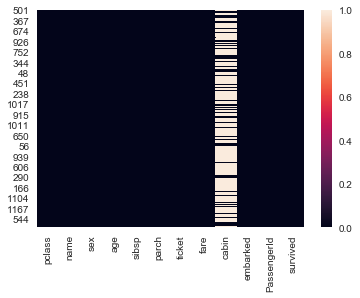

In [267]:
# Let's now check the dataset again to see if there are columns having null values.
# As usual, we'll use a heatmap plot
sb.heatmap(train_dataset.isnull())

In [268]:
# You can see from the heatmap that theres is much missing values in the cabin column. 
# Let's now get the actual count of the values by geting the details of the dataset using the info() function 
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 501 to 684
Data columns (total 12 columns):
pclass         916 non-null int64
name           916 non-null object
sex            916 non-null object
age            916 non-null float64
sibsp          916 non-null int64
parch          916 non-null int64
ticket         916 non-null object
fare           916 non-null float64
cabin          214 non-null object
embarked       916 non-null object
PassengerId    916 non-null int64
survived       916 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 93.0+ KB


In [269]:
test_dataset.isnull().sum()

pclass           0
name             0
sex              0
age             88
sibsp            0
parch            0
ticket           0
fare             1
cabin          312
embarked         0
PassengerId      0
dtype: int64

In [270]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 1139 to 88
Data columns (total 11 columns):
pclass         393 non-null int64
name           393 non-null object
sex            393 non-null object
age            305 non-null float64
sibsp          393 non-null int64
parch          393 non-null int64
ticket         393 non-null object
fare           392 non-null float64
cabin          81 non-null object
embarked       393 non-null object
PassengerId    393 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 36.8+ KB


In [271]:
# We also apply the imput(age) function to update the data columns of the test_dataset
# If you run this cell, it would issue a warning. Just ignore it!
test_dataset['age'] = test_dataset[['age', 'pclass']].apply(imput, axis = 1)


In [272]:
test_dataset.isnull().sum()

pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             1
cabin          312
embarked         0
PassengerId      0
dtype: int64

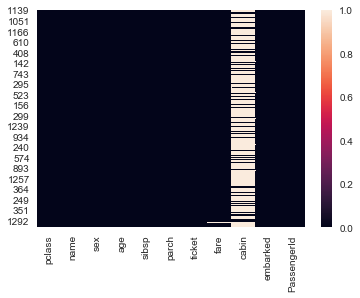

In [273]:
# Now you can see that there is no null values in the age column
# You can verify that using the heatmap plot
sb.heatmap(test_dataset.isnull())

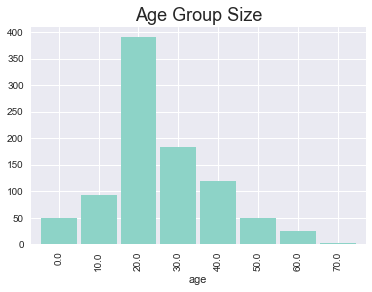

In [274]:
# For now, let's just not worry about cabin.  Let's go ahead to analyse our data
train_dataset.groupby(train_dataset.age//10*10).size().plot.bar(cmap='Set3', width=0.9)

# The line above means that we are grouping the data by 10 in steps of 10 and we would have 10 groups (10//10)
# cmap='Set3' gives a list of RGB colors that are good for plotting a series of lines on a dark background.

plt.title('Age Group Size', fontsize = 18)
plt.show()

In [175]:
# What do we learn from the graph?
# 1. The number of  passengers on board the Titanic that is of age 20 is highest. About 400. That is much more that other age groups
# 2. The passengers that are from 60 year upwards are fewest
# Let's do some more analysis

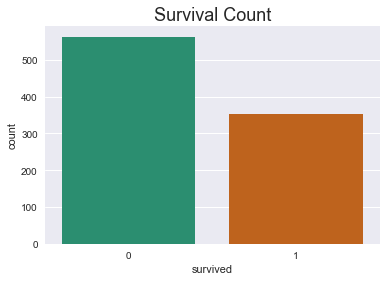

In [176]:
# We want to visualise the number of passengers that survived.
# We would do this using countplot, whith is part of the seaborn module

sb.countplot(x='survived', data = train_dataset, palette = 'Dark2')
plt.title('Survival Count', fontsize = 18)
plt.show()

In [177]:
# From the plot above, we can see that over 500 died while over 350 survived

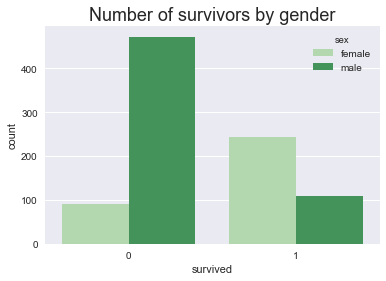

In [275]:
# Let's now see the number of survivors based on their gender
# We also use the countplot() function, but this time we use the hue attribute the set the sex

sb.countplot(x='survived', hue = train_dataset['sex'], data = train_dataset, palette='Greens')
plt.title('Number of survivors by gender', fontsize = 18)
plt.show()

In [179]:
# Here we can see that 
# 1. the number of female survivor are about twice that of male survivors
# 2. about 400 males survived, while less that 100 females died
# 3. over 200 females survived while about 100 mails survived

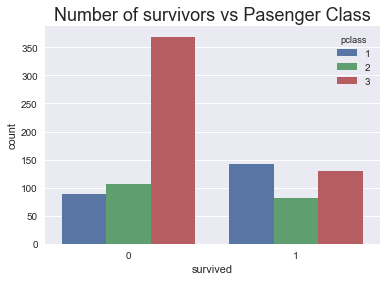

In [276]:
# Let's now check the survivors based on the passenger's class

sb.countplot(x='survived', hue='pclass', data = train_dataset)
plt.title('Number of survivors vs Pasenger Class', fontsize=18)
plt.show()

In [277]:
# From the plot we can see that
# 1. highest nubmer that died are in class 3
# 2. number of passengers that survived are about the same for all the classes though it is slightly lower for class 2

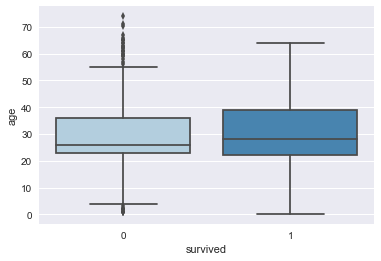

In [278]:
# Now let's see how the age of the passenger relates to survival
# This time we'll use a boxplot
sb.boxplot(x='survived', y='age', data=train_dataset, palette = 'Blues')
plt.show()

In [279]:
# From the boxplot, we see that number that survived or died are in about the same age group

In [280]:
# **************************** SOME MORE SERIOUS ANALYSIS *******************************

# We first split the training dataset again into training and test datasets
# This time it would be 80%  train to 20% test
from sklearn.model_selection import train_test_split

classes = train_dataset['survived']
features = train_dataset.drop(['survived'], axis=1)

X_train, x_test, y_train, y_test = train_test_split(features, classes, test_size=0.2, random_state=101)

In [281]:
# Now we are getting ready to build our model
# First we set the model parameters. What is called hyperparameters
# This would ba tuple of parameter name and value as a list

params = {
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

In [282]:
# This parameters need to be optimized. There are two libraries we can used to optimize them. 
# They are RandomizedSearchCV and GridSearchCV.
# Both are available in sklearn.model_selection module

# Then the classifier we are going to use is called XGBClassifier. It is available in the xgboost.sklearn module

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields name, sex, ticket, cabin, embarked

In [194]:
# Now we have an error saying that the module xgboot is not found
# So we are going to install it 
# So open command promt as administrator and run pip install xgboost
# After installing it successfully, then append the installation directory to the PYTHONPATH
# If it doesn't work, open Anaconda Prompt and repeat the inatallation
import sys
sys.path.append('C:\Program Files\Python37\Lib\site-packages')

In [226]:
# Lets convert the string values of sex (Male and Female) to 0 and 1
# X_train['sex'].replace(0, 'female',inplace=True)
# X_train['sex'].replace(1, 'male',inplace=True)

In [283]:
X_train.sex[X_train.sex == 'male'] = 1
X_train.sex[X_train.sex == 'female'] = 0

# Same goes for x_test
x_test.sex[x_test.sex == 'male'] = 1
x_test.sex[x_test.sex == 'female'] = 0

In [284]:
# Now convert some the sex column to numeric
X_train['sex'] = X_train['sex'].astype(float)
x_test['sex'] = x_test['sex'].astype(float)

In [285]:
# Check that is has been converted to numneric value
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 919 to 388
Data columns (total 11 columns):
pclass         732 non-null int64
name           732 non-null object
sex            732 non-null float64
age            732 non-null float64
sibsp          732 non-null int64
parch          732 non-null int64
ticket         732 non-null object
fare           732 non-null float64
cabin          172 non-null object
embarked       732 non-null object
PassengerId    732 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 68.6+ KB


In [208]:
# Just to check to make sure
X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,PassengerId
919,3,"Katavelas, Mr. Vassilios (""Catavelas Vassilios"")",1,18.5,0,0,2682,7.2292,NaN,C,919
1064,3,"Niskanen, Mr. Juha",1,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S,1064
219,1,"Omont, Mr. Alfred Fernand",1,37.0,0,0,F.C. 12998,25.7417,NaN,C,219
1289,3,"Wiklund, Mr. Karl Johan",1,21.0,1,0,3101266,6.4958,NaN,S,1289
7,1,"Andrews, Mr. Thomas Jr",1,39.0,0,0,112050,0.0000,A36,S,7


In [286]:
# Let's see if we can do the same thing with the embarked column
# First let's check how many distinct values are there
X_train['embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [287]:
# So we are fortunate! There are only three distint values C, S and Q
# We can now assing C = 1, S = 2, and Q = 3


In [288]:
X_train.embarked[X_train.embarked == 'C'] = 1
X_train.embarked[X_train.embarked == 'S'] = 2
X_train.embarked[X_train.embarked == 'Q'] = 3

# Do the same for test dataset
x_test.embarked[x_test.embarked == 'C'] = 1
x_test.embarked[x_test.embarked == 'S'] = 2
x_test.embarked[x_test.embarked == 'Q'] = 3

In [289]:
# Again, we convert the fields to numeric as below. Just like we did for the sex field
X_train['embarked'] = X_train['embarked'].astype(float)
x_test['embarked'] = x_test['embarked'].astype(float)

In [290]:
# Let's just re-check everything once again
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 919 to 388
Data columns (total 11 columns):
pclass         732 non-null int64
name           732 non-null object
sex            732 non-null float64
age            732 non-null float64
sibsp          732 non-null int64
parch          732 non-null int64
ticket         732 non-null object
fare           732 non-null float64
cabin          172 non-null object
embarked       732 non-null float64
PassengerId    732 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 68.6+ KB


In [291]:
# Also check for x_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 879 to 547
Data columns (total 11 columns):
pclass         184 non-null int64
name           184 non-null object
sex            184 non-null float64
age            184 non-null float64
sibsp          184 non-null int64
parch          184 non-null int64
ticket         184 non-null object
fare           184 non-null float64
cabin          42 non-null object
embarked       184 non-null float64
PassengerId    184 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 17.2+ KB


In [296]:
# We yet have 3 more columns that are not numeric: name, ticket and cabin
# All we need to do is to just drop them
# Remove other unneccessary fields fields:
X_train.drop(['name','ticket', 'cabin'], axis =1, inplace=True)
X_test.drop(['name','ticket', 'cabin'], axis =1, inplace=True)

In [297]:
x_test.head()
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,PassengerId
919,3,1.0,18.5,0,0,7.2292,1.0,919
1064,3,1.0,39.0,0,0,7.9250,2.0,1064
219,1,1.0,40.0,0,0,25.7417,1.0,219
1289,3,1.0,21.0,1,0,6.4958,2.0,1289
7,1,1.0,39.0,0,0,0.0000,2.0,7


In [315]:
# ************************************** SIMPLE DECISION TREE CLASSIFIER ******************************
# Using simple Decision Tree classifier
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [316]:
# Let's now see the performance of this model using the test data
# First let's get information about the test data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 1139 to 88
Data columns (total 8 columns):
pclass         393 non-null int64
sex            393 non-null object
age            393 non-null float64
sibsp          393 non-null int64
parch          393 non-null int64
fare           392 non-null float64
embarked       393 non-null object
PassengerId    393 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 27.6+ KB


In [298]:
# Now we can rerun the code. I'll copy and paste it below and rerun it
# This parameters need to be optimized. There are two libraries we can used to optimize them. 
# They are RandomizedSearchCV and GridSearchCV.
# Both are available in sklearn.model_selection module

# Then the classifier we are going to use is called XGBClassifier. It is available in the xgboost.sklearn module

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [301]:
# Let's now use the optimizers to optimize the model
# First we would use RamdomSearch

random_search=RandomizedSearchCV(model, 
                                param_distributions=params, 
                                n_iter=5, 
                                scoring='roc_auc', 
                                n_jobs=-1, 
                                cv=5, 
                                verbose=3)

In [303]:
# This takes a some time to complete!
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   22.2s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [304]:
# Lets check the best estimators for the RandomSearch optimizer
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
       learning_rate=0.25, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [305]:
# Let's check the best parameters for the RandomSearch optimizer
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [307]:
# Now we would repeat the classification. 
# This time we would first create a classifier, using the best parameters and estimators 

xgb = XGBClassifier(base_score=0.5, 
                    booster='gbtree', 
                    colsample_bylevel=1,
                    colsample_bynode=1, 
                    colsample_bytree=0.5, 
                    gamma=0.2,
                    learning_rate=0.25, 
                    max_delta_step=0, 
                    max_depth=8,
                    min_child_weight=7, 
                    missing=None, 
                    n_estimators=100, 
                    n_jobs=1,
                    nthread=None, 
                    objective='binary:logistic', 
                    random_state=0,
                    reg_alpha=0, 
                    reg_lambda=1, 
                    scale_pos_weight=1, 
                    seed=None,
                    silent=None, 
                    subsample=1, 
                    verbosity=1)

# The we fit out data using the classifier
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
       learning_rate=0.25, max_delta_step=0, max_depth=8,
       min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [308]:
# Let's now make some prediction using out classifier
# We would use the x_test dataset
y_pred = xgb.predict(x_test)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields name, ticket, cabin

In [309]:
# Oh, we need to remove name, ticket and cabin columns from the x_test. I tought i already did!
x_test = x_test.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)

In [312]:
# Now repeat the prediction
y_pred = xgb.predict(x_test)

XGBoostError: [16:19:33] C:\Jenkins\workspace\xgboost-win64_release_0.90\src\c_api\c_api.cc:837: DMatrix/Booster has not been intialized or has already been disposed.

ValueError: could not convert string to float: 'S'